In [47]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math

from PIL import Image
from mpl_toolkits.mplot3d import Axes3D
from math import log10, sqrt

!pip install pycryptodome
from Crypto.Cipher import AES
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


(102400, 3)

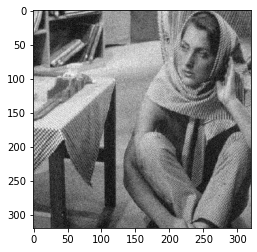

In [48]:
original_img = cv2.imread('/content/drive/My Drive/Colab Notebooks/clone_img.jpeg')

steg_img = original_img.copy()

o_img = cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB)
s_img = cv2.cvtColor(o_img, cv2.COLOR_BGR2RGB)

cv2.imwrite('/content/drive/My Drive/Colab Notebooks/s_img.jpeg',s_img)

plt.imshow(s_img)
plt.imshow(o_img)

# -1 means unknown, it will be automatically calculated
vector_img = o_img.reshape((-1, 3))
vector_img = np.float32(vector_img)
vector_img.shape

[[182 182 182]
 [ 51  51  51]
 [118 118 118]]
[[0]
 [0]
 [0]
 ...
 [2]
 [2]
 [2]]


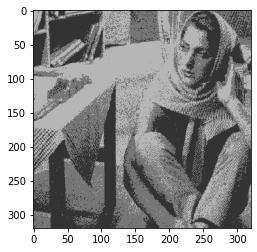

In [49]:
# criteria : It is the iteration termination criteria. When this criteria is satisfied, algorithm iteration stops.
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
K = 3
attempts = 1
ret, lable, center = cv2.kmeans(vector_img, K, None, criteria, attempts, cv2.KMEANS_PP_CENTERS)

center = np.uint8(center)
print(center)
res = center[lable.flatten()]

res_image = res.reshape((o_img.shape))
plt.imshow(res_image)
clustered_img = Image.fromarray(res_image)
clustered_img.save('/content/drive/My Drive/Colab Notebooks/clustered_img.png')
print(lable)

In [50]:
def messageToBinary(message):
    if type(message) == str:
        return ''.join([ format(ord(i), "08b") for i in message ])
    elif type(message) == bytes: #or type(message) == np.ndarray:
        return ''.join([ format(i, "08b") for i in message ])
    elif type(message) == np.ndarray:
        return [format(i, "08b") for i in message]
    elif type(message) == int or type(message) == np.uint8:
        return format(message, "08b")
    else:
        raise TypeError("Input type not supported")

In [51]:
def showData(image):

    binary_data1 = ""
    binary_data2 = ""
    binary_data3 = ""
    lable_index=0
    for values in image:
        for pixel in values:

          if lable[lable_index]==0:
            r, g, b = messageToBinary(pixel) #convert the red,green and blue values into binary format
            binary_data1 += r[-1] #extracting data from the least significant bit of red pixel
            binary_data1 += g[-1] #extracting data from the least significant bit of red pixel
            binary_data1 += b[-1] #extracting data from the least significant bit of red pixel

          if lable[lable_index]==1:
            r, g, b = messageToBinary(pixel) #convert the red,green and blue values into binary format
            binary_data2 += r[-1] #extracting data from the least significant bit of red pixel
            binary_data2 += g[-1] #extracting data from the least significant bit of red pixel
            binary_data2 += b[-1] #extracting data from the least significant bit of red pixel

          if lable[lable_index]==2:
            r, g, b = messageToBinary(pixel) #convert the red,green and blue values into binary format
            binary_data3 += r[-1] #extracting data from the least significant bit of red pixel
            binary_data3 += g[-1] #extracting data from the least significant bit of red pixel
            binary_data3 += b[-1] #extracting data from the least significant bit of red pixel


    # split by 8-bits
    all_bytes1 = [ binary_data1[i: i+8] for i in range(0, len(binary_data1), 8) ]
    all_bytes2 = [ binary_data2[i: i+8] for i in range(0, len(binary_data2), 8) ]
    all_bytes3 = [ binary_data3[i: i+8] for i in range(0, len(binary_data3), 8) ]
    
    all_bytes = all_bytes1+ all_bytes2 + all_bytes3
    # convert from bits to characters
    decoded_data = b''
    for byte in all_bytes:
      try:
        decoded_data += int(byte, 2).to_bytes(len(byte) // 8, byteorder='big')#chr(int(byte, 2))
        if decoded_data[-5:] == b'#####': #check if we have reached the delimeter which is "#####"
            print("TEST",decoded_data[-5:])
            break
      except Exception as e:
        print(byte)
        break
    
    # print(decoded_data)
    return decoded_data[:-5] #remove the delimeter to show the original hidden message

In [52]:
img = cv2.imread('/content/drive/My Drive/Colab Notebooks/steg_img.png')
txt = showData(img)
print(txt)

key = b'Sixteen byte key'
cipher = AES.new(key, AES.MODE_ECB)
text = cipher.decrypt(txt)

print(mess)

Streaming output truncated to the last 5000 lines.
OOPS
OOPS
OOPS
OOPS
OOPS
OOPS
OOPS
OOPS
OOPS
OOPS
OOPS
OOPS
OOPS
OOPS
OOPS
OOPS
OOPS
OOPS
OOPS
OOPS
OOPS
OOPS
OOPS
OOPS
OOPS
OOPS
OOPS
OOPS
OOPS
OOPS
OOPS
OOPS
OOPS
OOPS
OOPS
OOPS
OOPS
OOPS
OOPS
OOPS
OOPS
OOPS
OOPS
OOPS
OOPS
OOPS
OOPS
OOPS
OOPS
OOPS
OOPS
OOPS
OOPS
OOPS
OOPS
OOPS
OOPS
OOPS
OOPS
OOPS
OOPS
OOPS
OOPS
OOPS
OOPS
OOPS
OOPS
OOPS
OOPS
OOPS
OOPS
OOPS
OOPS
OOPS
OOPS
OOPS
OOPS
OOPS
OOPS
OOPS
OOPS
OOPS
OOPS
OOPS
OOPS
OOPS
OOPS
OOPS
OOPS
OOPS
OOPS
OOPS
OOPS
OOPS
OOPS
OOPS
OOPS
OOPS
OOPS
OOPS
OOPS
OOPS
OOPS
OOPS
OOPS
OOPS
OOPS
OOPS
OOPS
OOPS
OOPS
OOPS
OOPS
OOPS
OOPS
OOPS
OOPS
OOPS
OOPS
OOPS
OOPS
OOPS
OOPS
OOPS
OOPS
OOPS
OOPS
OOPS
OOPS
OOPS
OOPS
OOPS
OOPS
OOPS
OOPS
OOPS
OOPS
OOPS
OOPS
OOPS
OOPS
OOPS
OOPS
OOPS
OOPS
OOPS
OOPS
OOPS
OOPS
OOPS
OOPS
OOPS
OOPS
OOPS
OOPS
OOPS
OOPS
OOPS
OOPS
OOPS
OOPS
OOPS
OOPS
OOPS
OOPS
OOPS
OOPS
OOPS
OOPS
OOPS
OOPS
OOPS
OOPS
OOPS
OOPS
OOPS
OOPS
OOPS
OOPS
OOPS
OOPS
OOPS
OOPS
OOPS
OOPS
OOPS
OOPS
OOPS
OOPS
OOPS

ValueError: ignored